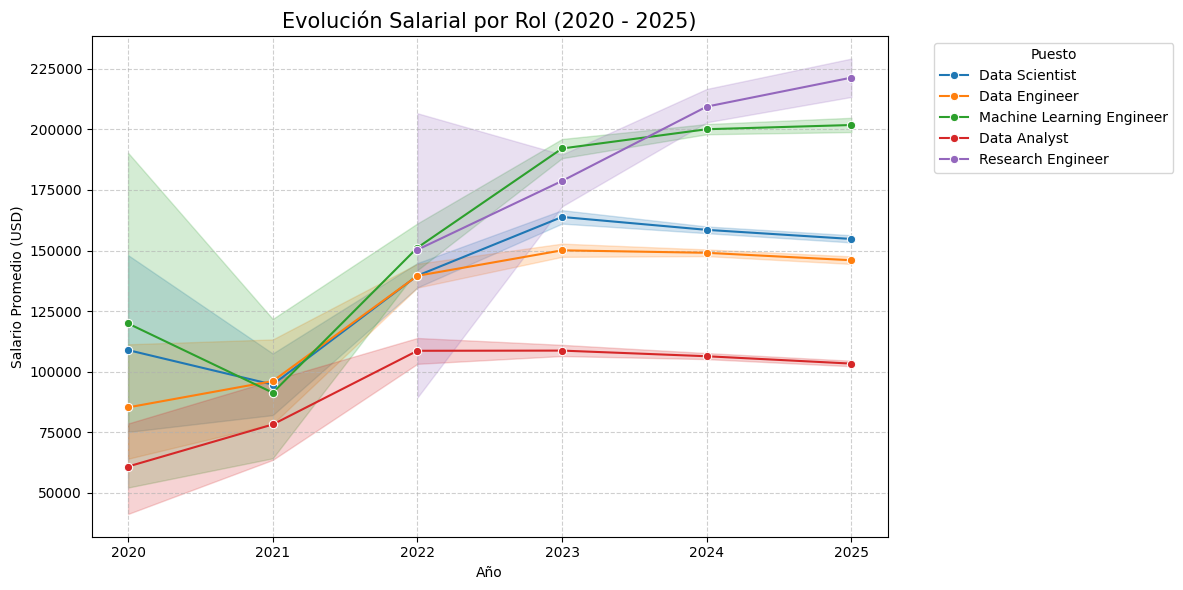


--- % DE CRECIMIENTO SALARIAL (2024 vs 2025) ---
job_title
Research Engineer            5.710554
Machine Learning Engineer    0.871100
Data Engineer               -2.058583
Data Scientist              -2.372391
Data Analyst                -2.855688
dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LEER LOS DATOS

df = pd.read_csv('salaries.csv')

# 2. SELECCIONAR EL "TOP 5" DE ROLES

top_roles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Engineer']
df_top = df[df['job_title'].isin(top_roles)]

# 3. CREAR LA GRÁFICA DE EVOLUCIÓN
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x='work_year', y='salary_in_usd', hue='job_title', marker='o')

# Personalización para que se vea profesional
plt.title('Evolución Salarial por Rol (2020 - 2025)', fontsize=15)
plt.ylabel('Salario Promedio (USD)')
plt.xlabel('Año')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Puesto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


plt.savefig('grafica_evolucion.png', dpi=300, bbox_inches='tight')


plt.show()

# 4. CALCULAR EL CRECIMIENTO
# Comparamos el promedio de 2024 contra el de 2025
promedios = df_top.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack()
crecimiento = ((promedios.loc[2025] - promedios.loc[2024]) / promedios.loc[2024]) * 100
print("\n--- % DE CRECIMIENTO SALARIAL (2024 vs 2025) ---")
print(crecimiento.sort_values(ascending=False))

/tmp/ipython-input-8665956.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Modalidad', y='salary_in_usd', data=df, palette='Set2')


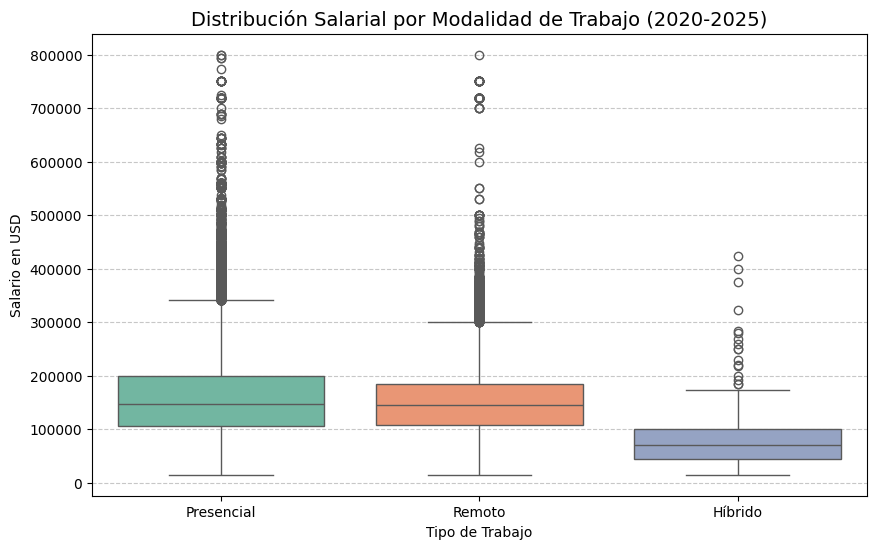

--- SALARIO PROMEDIO POR MODALIDAD ---
Modalidad
Presencial    159382.780154
Remoto        151285.861599
Híbrido        81711.629179
Name: salary_in_usd, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar datos
df = pd.read_csv('salaries.csv')

# 2. Mapear los números a etiquetas legibles
# Creamos una nueva columna llamada 'Modalidad'
mapeo = {0: 'Presencial', 50: 'Híbrido', 100: 'Remoto'}
df['Modalidad'] = df['remote_ratio'].map(mapeo)

# 3. Crear la gráfica de caja (Boxplot)
# El boxplot es genial porque muestra el promedio y la dispersión (qué tanto varían los sueldos)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modalidad', y='salary_in_usd', data=df, palette='Set2')

plt.title('Distribución Salarial por Modalidad de Trabajo (2020-2025)', fontsize=14)
plt.ylabel('Salario en USD')
plt.xlabel('Tipo de Trabajo')
plt.grid(axis='y', linestyle='--', alpha=0.7)



# Guardamos con un nombre diferente
plt.savefig('grafica_modalidad.png', dpi=300, bbox_inches='tight')

# Mostramos en pantalla
plt.show()


# 4. Resumen estadístico simple
print("--- SALARIO PROMEDIO POR MODALIDAD ---")
print(df.groupby('Modalidad')['salary_in_usd'].mean().sort_values(ascending=False))

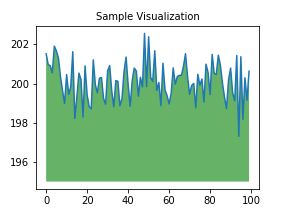

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)